# Libraries

In [7]:
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pandas as pd
from tqdm import tqdm
import time

notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

import utils_ric as utils
from info import patient

current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MIRA/final_project/MIRA_FINAL_PROJECT/notebooks


# Compare results in Excel file

We want to compare the results of the different models. <br/>
This will be done by computing the mean and standard deviation across all 4 patients per model.

In [8]:
#get all paths for file in the result folder
result_path  = repo_path / 'data/results'
result_paths = list(result_path.glob('**/*.csv'))
comparison_df = pd.DataFrame(columns=['method', 'pat_mean', 'pat_std', 'time'])
for i in result_paths:
    #read the csv file
    df = pd.read_csv(i)
    #get the method name
    method = i.stem
    #get mean_tre column and get the mean
    mean_tre = df['mean_tre'].mean()
    #same for std
    std_tre = df['std_tre'].mean()
    #and for time
    time = df['time'].mean()
    #concate values in comparison using concat
    comparison_df = pd.concat([comparison_df, pd.DataFrame([[method, mean_tre, std_tre, time]], columns=['method', 'pat_mean', 'pat_std', 'time'])], ignore_index=True)
#save a xlsx file with the comparison
comparison_df.to_excel(repo_path / 'data/results/comparison.xlsx', index=False)

# Visualize results

We make diagrams to visualize the results.

Text(0.5, 1.0, 'mean tre vs std tre')

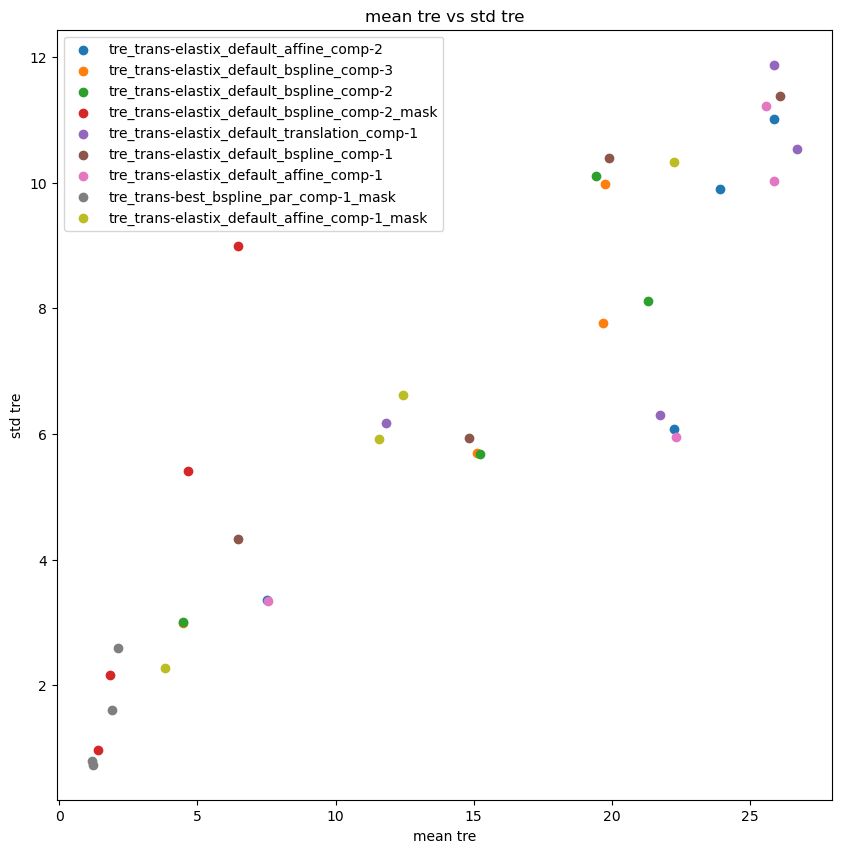

In [15]:
#get all paths for file in the result folder
result_path  = repo_path / 'data/results'
result_paths = list(result_path.glob('**/*.csv'))
#append all results in a dataframe
all_results_df = pd.DataFrame()
for i in result_paths:
    #read the csv file
    df = pd.read_csv(i)
    #get the method name
    method = i.stem
    #add a column with the method name at the end of df
    df['method'] = method
    #append the dataframe using concat
    all_results_df = pd.concat([all_results_df, df], ignore_index=True)
#make plot with mean tre as x coordinate and std as y coordinate using all_results_df
plt.figure(figsize=(10,10))
#give the same color to points of the same method according to df['method'].
for i in all_results_df['method'].unique():
    plt.scatter(all_results_df[all_results_df['method'] == i]['mean_tre'], all_results_df[all_results_df['method'] == i]['std_tre'], label=i)
#show the legend
plt.legend()

plt.xlabel('mean tre')
plt.ylabel('std tre')
plt.title('mean tre vs std tre')
